In [20]:
#import important libraries that we'll be using
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv')
#with the head we can have 5 reports top most and we can view the feature
data.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
set(data['diagnosis'])
# this will print out the unique classes of the feature diagnosis

{'B', 'M'}

In [6]:
# Now if i want to see the shape of our data
data.shape
# this will tell me the number of rows and cols of my data

(569, 32)

In [8]:
# now lets check the sum of null values in our data
data.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# there is no null value so no need to drop any null feature if we had one we would have dropped it
# now if you want to check the value count of any specific feature
# lets check the value count of diagnosis
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='count', ylabel='diagnosis'>

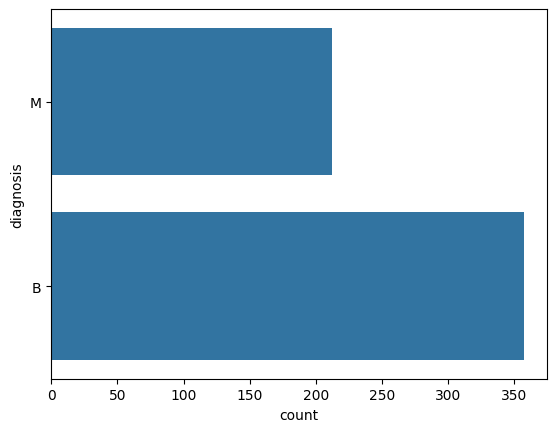

In [12]:
#  now lets visualize it using the count plot method
sns.countplot(data['diagnosis'], label='count',)

In [15]:
# inorder to check the datatypes of all features you can call method dtypes on data
data.dtypes
# diagnosis is of type object and all the other features are of type float

id                           int64
diagnosis                   object
Radius_mean                float64
Texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [16]:
# now the object is of type category we'll convert this into 0,1
# there are two methods for doing this
# onehotEncoding , labelEncoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# now lets extract the column we want to do labelencoding

data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'].values)
# here what we have done is we have taken the diagnosis column and then applied
# labelencoding on its values  now we'll have 0 , and 1 instead of M and B

each particular num will indicate the correlation
why do we do that for example there are two features that gives high correlation
they deliver similar kind of result we can remove to reduce the dimensions and reduce the time required


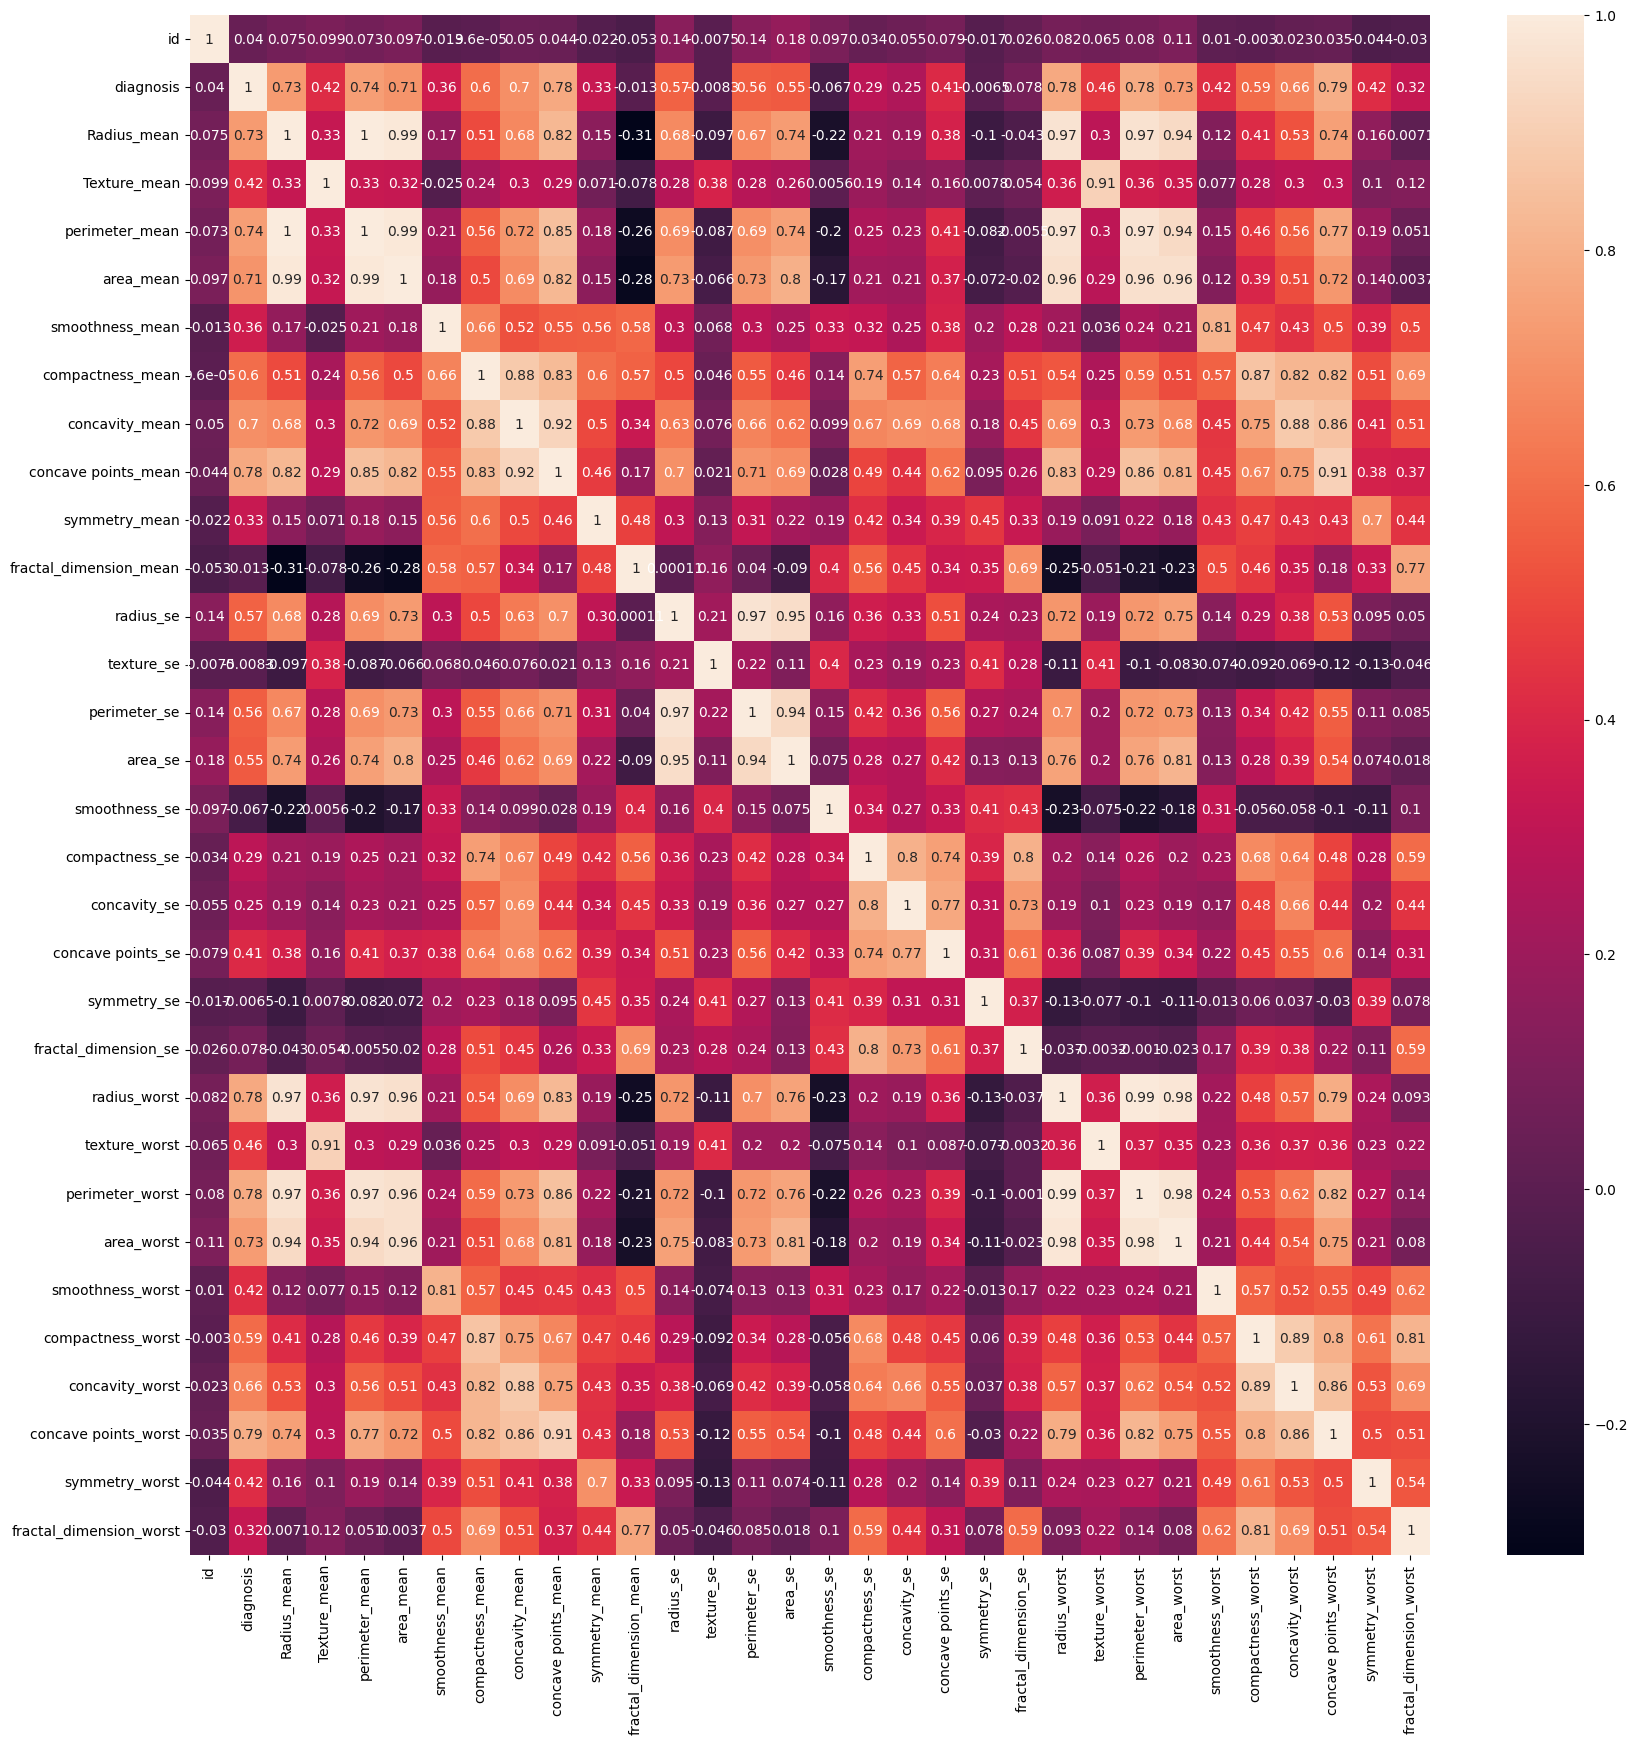

In [24]:
# lets find out the correlation matrix of feature
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
# lets save the pic i will upload this picture on git
plt.savefig('correlation-values.png')


# Feature Engineering


In [25]:
# Calculate height (approximated by area / perimeter)
data['height_worst'] = data['area_worst'] / data['perimeter_worst']

# Calculate volume of cylinder using radius and height
data['volume_worst'] = np.pi * (data['radius_worst'] ** 2) * data['height_worst']

# Drop the other fields
data.drop(['radius_worst', 'perimeter_worst', 'area_worst', 'height_worst'], axis=1, inplace=True)


# Creating input and output Features
X indicates the input features
y indicate output feature

In [26]:
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

#Data Splitting
random state if you are mentioning the same value at that time mapping of training and testing will be same

In [29]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y ,test_size=0.25 , random_state=44)

#Scalling of the feature

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#Multiple ML Classification Models
now applying multiple classification model to solve the classification Prob

In [40]:
def models(X_train,y_train):
  # Now training the model using logistic regression
  from sklearn.linear_model import LinearRegression
  model_1 = LinearRegression()
  model_1.fit(X_train,y_train)
  # training using the KNN Classifier
  from sklearn.neighbors import KNeighborsClassifier
  model_2 = KNeighborsClassifier()
  model_2.fit(X_train,y_train)
  # training using RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  model_3 = RandomForestClassifier()
  model_3.fit(X_train,y_train)
  # training the model using GaussianNB classifier
  from sklearn.naive_bayes import GaussianNB
  model_4 = GaussianNB()
  model_4.fit(X_train,y_train)
  # training the model on Decision Tree Classifier
  from sklearn.tree import DecisionTreeClassifier
  model_5 = DecisionTreeClassifier()
  model_5.fit(X_train,y_train)

  # Printing the Accuraccy of these models
  print("Logistic Regression Classifier Training Accuracy",model_1.score(X_train,y_train))
  print("KNN Classifier Training Accuracy",model_2.score(X_train,y_train))
  print("Random Forest Classifier Training Accuracy",model_3.score(X_train,y_train))
  print("GausianNB Classifier Training Accuracy",model_4.score(X_train,y_train))
  print("Decision Tree Classifier Training Accuracy",model_5.score(X_train,y_train))
  return model_1,model_2,model_3,model_4,model_5

In [41]:
model = models(X_train,y_train)

Logistic Regression Classifier Training Accuracy 0.7728783067969922
KNN Classifier Training Accuracy 0.9765258215962441
Random Forest Classifier Training Accuracy 1.0
GausianNB Classifier Training Accuracy 0.92018779342723
Decision Tree Classifier Training Accuracy 1.0


#Prediction display

In [51]:
for i in range(len(model)):
  y_pred = model[i].predict(X_test)
  print(y_pred)
  print()
  print()
  print(y_test)
  print()

[ 6.19074665e-01  1.00486023e+00  2.79863104e-01  1.21443211e+00
  4.26617875e-01  2.25036400e-01  2.32071384e-02  2.98735217e-01
  9.89403884e-01  5.25372308e-02  3.58005472e-01  1.68016349e-01
  1.05527175e+00  6.39150785e-01 -7.43506119e-02  2.38684791e-01
  3.75733497e-02  9.85252781e-01  8.38037022e-01  1.24167258e-01
 -1.71144944e-01  2.69686003e-01  1.39630429e-03  1.25864802e-01
  2.53965849e-01  3.42251330e-01  2.14993751e-01  2.28220585e-01
  7.59217135e-01 -3.20453645e-01  2.81843241e-01  5.93815985e-02
  4.21434076e-02  2.02475398e-02  1.01150609e-01  5.31429620e-02
  1.71321424e-01 -5.28583335e-02 -5.82498025e-03  2.92687682e-01
  1.57239250e-01  2.45436457e-01  1.08665210e+00  4.72050334e-01
  3.23682803e-01  2.30422612e-01  1.66875196e-01  1.39505825e-01
  2.49067540e-01  1.04976994e+00  2.27864300e-01 -2.16612315e-01
 -6.85034113e-01  7.93909236e-01  2.08996045e-01  7.53289559e-01
  5.85491064e-01  5.85540241e-02 -1.08539285e-01  1.40653338e-01
 -1.10880441e-01  2.73577